## 3. User Behaviour in Different Time Scales

##### User behaviour in a week

In [1]:
import pandas as pd
import numpy as np

In [2]:
users = pd.read_csv('/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_2m.csv')
users.drop('Unnamed: 0', axis=1, inplace=True)
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [4]:
# aggregate status from 11.25-12.03
weekly_status=pd.DataFrame(users.groupby(['date','status'], as_index=False).user_id.count())
weekly_status = weekly_status.pivot(index='date',columns='status')
weekly_status

user_id                      
status         buy   cart    fav      pv
date                                    
2017-11-25    5868  17040   9163  258856
2017-11-26    5995  18057   9245  260688
2017-11-27    6566  16564   8817  246517
2017-11-28    6055  16468   8639  242771
2017-11-29    6299  16771   8885  247401
2017-11-30    6458  17192   9177  251903
2017-12-01    6137  18759   9088  264524
2017-12-02    7707  23909  12058  334480
2017-12-03    7452  23228  11481  328748

In [6]:
# tidy column names
weekly_status.columns = ['buy', 'cart', 'fav', 'pv']
# put column names in order
weekly_status = weekly_status[['pv','fav','cart','buy']]
weekly_status

,pv,fav,cart,buy
date,,,,
2017-11-25,258856,9163,17040,5868
2017-11-26,260688,9245,18057,5995
2017-11-27,246517,8817,16564,6566
2017-11-28,242771,8639,16468,6055
2017-11-29,247401,8885,16771,6299
2017-11-30,251903,9177,17192,6458
2017-12-01,264524,9088,18759,6137
2017-12-02,334480,12058,23909,7707
2017-12-03,328748,11481,23228,7452


In [7]:
# preparetion for visual
print(list(weekly_status.pv.values))

print(list(weekly_status.fav.values))

print(list(weekly_status.cart.values))

print(list(weekly_status.buy.values))

[258856, 260688, 246517, 242771, 247401, 251903, 264524, 334480, 328748]
[9163, 9245, 8817, 8639, 8885, 9177, 9088, 12058, 11481]
[17040, 18057, 16564, 16468, 16771, 17192, 18759, 23909, 23228]
[5868, 5995, 6566, 6055, 6299, 6458, 6137, 7707, 7452]


In [13]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
from IPython.display import IFrame
from IPython.display import Image
c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(list(weekly_status.index))
    .add_yaxis("pv", [258856, 260688, 246517, 242771, 247401, 251903, 264524, 334480, 328748]) #tried using list(weekly_status.pv.values), doesn't work
    .add_yaxis("cart", [17040, 18057, 16564, 16468, 16771, 17192, 18759, 23909, 23228])
    .add_yaxis("fav",[9163, 9245, 8817, 8639, 8885, 9177, 9088, 12058, 11481])
    .add_yaxis("buy", [5868, 5995, 6566, 6055, 6299, 6458, 6137, 7707, 7452])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Weekly_status : pv_cart_fav_buy"),
#         toolbox_opts=opts.ToolboxOpts(),
        legend_opts=opts.LegendOpts(is_show=False),
    )
    .render("bar_toolbox.html")
)
IFrame(src='./bar_toolbox.html', width=1200, height=600)

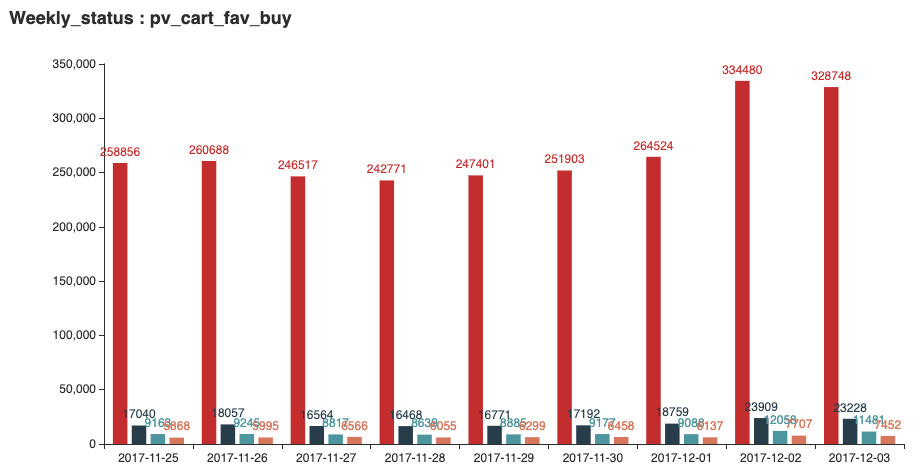

In [14]:
Image(filename='/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/pics/Weekly_status.png')

#### 12.02 and 12.03 are Saturday and Sunday. Clearly, numbers are elivated in the weekend which can be a good time for promotions.

#### User behaviour in a day

In [16]:
# results of this function will show hourly status within a day
def daily_status(df,str_colname1,str_colname2,str_colname3):
    temp = df.groupby([str_colname3,str_colname2],as_index=False).count()
    daily_num = temp.pivot(index=str_colname3,columns=str_colname2)
    daily_num.columns=['buy', 'cart', 'fav', 'pv']
    daily_num = daily_num[['pv','fav','cart','buy']]
    return (daily_num)

The lowest 11.28 and the highest 12.02 are choosen for a close look.

In [17]:
dec_2=users[users['date']=='2017-12-02'][['user_id','status','hour']]
nov_28=users[users['date']=='2017-11-28'][['user_id','status','hour']]

In [18]:
# prepare for visualization 

In [19]:
dec_2_pic = daily_status(dec_2,'user_id','status','hour')
nov_28_pic = daily_status(nov_28,'user_id','status','hour')

In [20]:
def hourly_2pic(listX,list1,list2,list3,list4,title_str):
    from pyecharts import options as opts
    from pyecharts.charts import Bar, Grid, Line
    from pyecharts.faker import Faker
    from IPython.display import IFrame
    bar = (
        Bar(init_opts=opts.InitOpts(width="800px", height="600px"))
        .add_xaxis(listX)
        .add_yaxis('pv',list1)
        .set_global_opts(title_opts=opts.TitleOpts(title=title_str))
    )
    line = (
        Line(init_opts=opts.InitOpts(width="800px", height="600px"))
        .add_xaxis(listX)
        .add_yaxis("fav", list2)
        .add_yaxis("cart", list3)
        .add_yaxis("buy", list4)
        .set_global_opts(
            title_opts=opts.TitleOpts(title=title_str, pos_top="48%"),
            legend_opts=opts.LegendOpts(pos_top="48%"),
        )
    )

    grid = (
        Grid(init_opts=opts.InitOpts(width="800px", height="600px"))
        .add(bar, grid_opts=opts.GridOpts(pos_bottom="60%"))
        .add(line, grid_opts=opts.GridOpts(pos_top="60%"))
        .render("grid_vertical.html")
    )

In [24]:
# Dec_02
hrs=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
pv_dec02=[10501, 5299, 2930, 1786, 1734, 2000, 4390, 8700, 11019, 13548, 
                15147, 15709, 14813, 16998, 16354, 17368, 17680, 15984, 16192, 21023,
                25508, 28747, 27787, 23263]
fav_dec02=[336, 236, 102, 91, 61, 66, 153, 298, 432, 531, 620, 643, 583, 624,
                605, 562, 599, 649, 528, 726, 889, 912, 952, 860]
cart_dec02=[736, 397, 212, 151, 129, 119, 359, 628, 810, 1023, 1033, 1139, 1045,
                1155, 1127, 1210, 1218, 1110, 1142, 1417, 1758, 2151, 2033, 1807]
buy_dec02=[188, 81, 52, 22, 28, 24, 67, 147, 223, 338, 514, 452, 425, 508, 489,
                466, 475, 362, 394, 428, 535, 560, 539, 390]
title_str = 'Dec_2_status'

In [27]:
# nov_28 
hrs=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
pv_nov28=[7303, 3184, 1893, 1363, 1110, 1628, 3959, 6107, 8336, 10186, 12133, 11263, 11953, 13477, 13468, 12931, 12584, 10891, 11635, 15710, 17302, 20658, 19902, 13795]
fav_nov28=[313, 81, 68, 33, 22, 60, 136, 253, 348, 373, 454, 462, 409, 522, 506, 388, 508, 443, 322, 584, 546, 588, 602, 618]
cart_nov28=[528, 237, 123, 75, 67, 102, 277, 385, 595, 708, 777, 773, 779, 852, 862, 918, 781, 773, 770, 998, 1205, 1434, 1469, 980]
buy_nov28=[154, 50, 27, 24, 14, 25, 58, 81, 198, 350, 373, 346, 411, 371, 359, 360, 372, 300, 265, 371, 425, 404, 426, 291]
title_str = 'Nov_28_status'

In [25]:
hourly_2pic(hrs,pv_dec02,fav_dec02,cart_dec02,buy_dec02,title_str)
IFrame(src='./grid_vertical.html', width=1200, height=600)

In [28]:
hourly_2pic(hrs,pv_nov28,fav_nov28,cart_nov28,buy_nov28,title_str)
IFrame(src='./grid_vertical.html', width=1200, height=600)

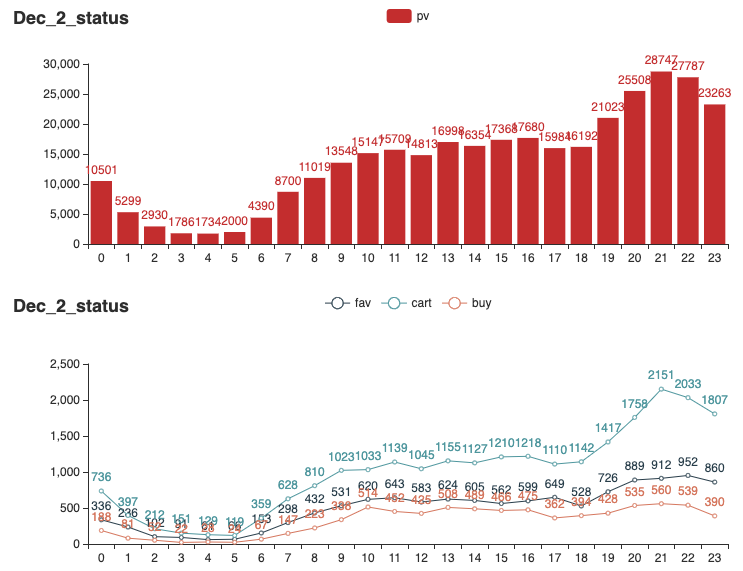

In [26]:
Image(filename='/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/pics/Dec_2_status.png')

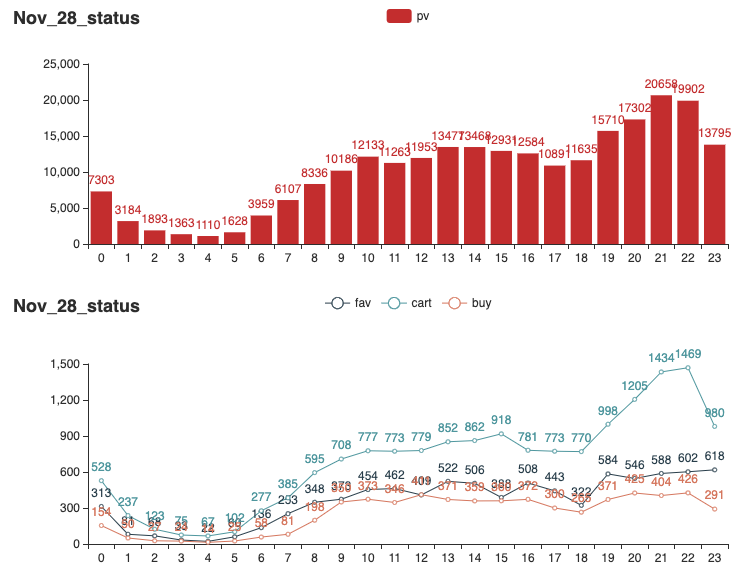

In [29]:
Image(filename='/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/pics/nov_28_status.png')

#### Majority users tend to be active between 19-23 pm. For platform and shop owners, it is the best time of the day to promote their products.